Pra rodar as células usa o comando SHIFT + ENTER

O objetivo dessa primeira célula é criar permissão pra utilizar o drive. 
Quando rodar a célula será gerado um link. 
Basta clicar no link e fazer login com sua conta do google.
Copia o texto que aparecer e cola no na caixa que aparecer depois dessa célula. ENTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Nessa parte escolhemos a data que será utilizada. Fica a vontade pra mudar.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/tweets_total.csv', encoding = 'utf-8')   

df = df[(df['date'] > '2013-05-01 00:00:00') & (df['date'] < '2013-07-31 09:00:00')]
df = df.dropna()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def palavra(x):
  x = x.split()
  if 'Whatsapp' in x:
    return True
  else:
    return False

df['tweet'].apply(palavra)

df[df['tweet'].apply(palavra)].to_excel('/content/drive/My Drive/Projeto Ana/Tweets_whatsapp.xlsx')


###Palavras mais frequentes

In [ ]:
def word_transform(words):
    words = words.split()
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '-', '@','"','...','dilma', 'faz']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [ ]:
df['tweet'] = df['tweet'].apply(word_transform)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [ ]:
import operator
lista = df['tweet'].values.tolist()

flat_list = reduce(operator.concat, lista)
flat_list = flat_list.split()

In [ ]:
words = count_vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40]

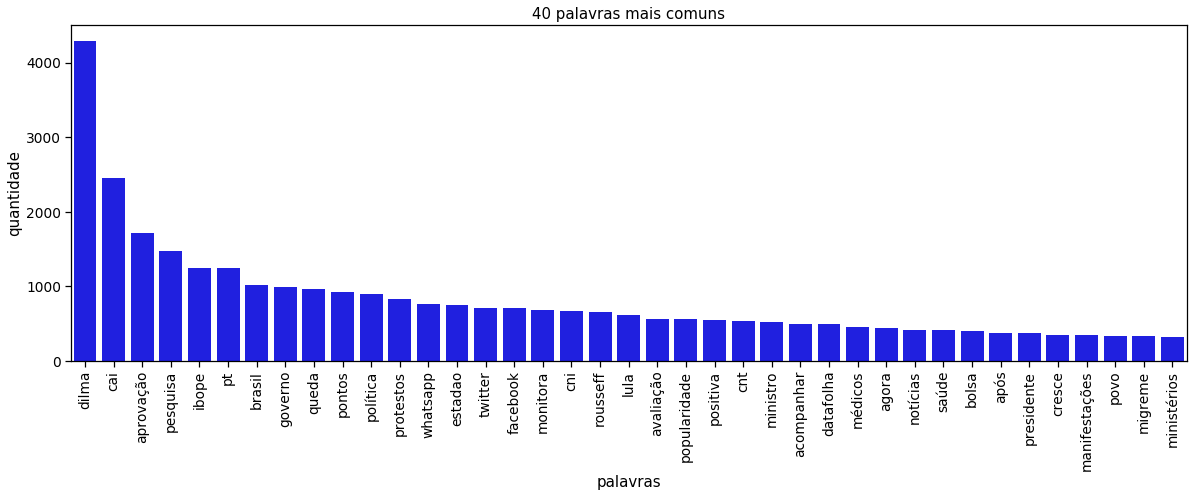

In [ ]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]

    del count_dict[2]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title='{} palavras mais comuns'.format(n))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, color = 'blue')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(flat_list)
                                               
plot_n_most_common_words(count_data, count_vectorizer,40)

### Gráfico de centralidade e co-ocorrência

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/tweets_total.csv', encoding = 'utf-8')   


df = df[(df['date'] > '2013-05-01 00:00:00') & (df['date'] < '2013-07-31 09:00:00')]
df = df.dropna()

In [ ]:
df_centralidade = df[['tweet']]

In [ ]:
df_centralidade['tweet'] = df_centralidade['tweet'].apply(word_transform)

texto_sem_tags = ' '.join(df_centralidade['tweet'].tolist())


l_sem_stopwords = texto_sem_tags.split()
t_sem_stopwords = u' '.join(l_sem_stopwords)

lista_tweets = df_centralidade['tweet'].tolist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)

    return polaridade, ausentes

freq_words = Counter(l_sem_stopwords)

w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])

datapath = '/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')

df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')

In [ ]:
def all_pairs(items):
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
 
    wpairs = all_pairs(words)

    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [ ]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)

In [ ]:
pop_words

[u'protestos',
 u'pol\xedtica',
 u'avalia\xe7\xe3o',
 u'brasil',
 u'pontos',
 u'queda',
 u'pt',
 u'pesquisa',
 u'cai',
 u'aprova\xe7\xe3o',
 u'dilma',
 u'\u2026']

In [ ]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    
    m = arr.min()
    M = arr.max()
 
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
 
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

 
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

  
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):

    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Nessa parte escolhemos qual palavra será o centro do Grafo. Pode escolher outra se for do interesse.

Graph visualization for query:


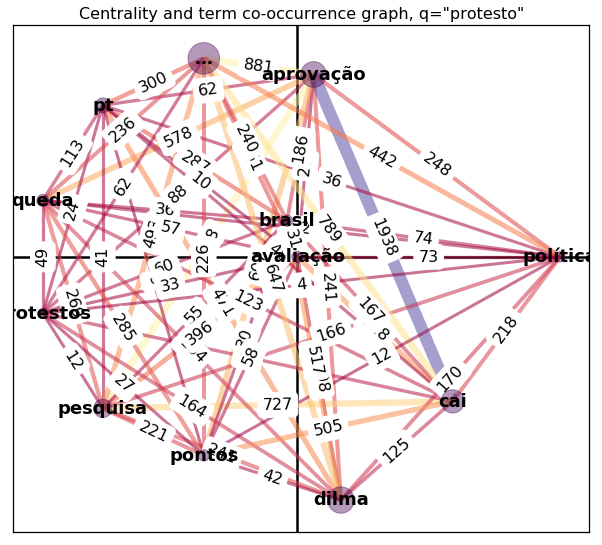

In [ ]:
query = 'protesto'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

### n-grams e dispersão lexical

In [ ]:
q = u'dilma'

In [ ]:
tokens = word_tokenize(t_sem_stopwords) 
text = nltk.Text(tokens)
text.concordance(q, width=130, lines=10)

Displaying 10 of 4585 matches:
                                                              dilma saúde tratada falatórios somente “ @ blogdonoblat : parecendo
ido projetos demais pro gosto pior anuncia tudo ai complica ô dilma coragem atenção galera lá esta `` tuconona mór '' brasil adiv
ário obery dizendo governo/dem quebrou rn demistas vendo caos dilma estória cisco trave olho parecendo biruta aeroporto ricardo n
lado vai coluna moreira leite sintetiza movimento subterrâneo dilma faz tumultuar o `` @ prof_adail : pib : lula : ano até … psdb
rto '' ricardo noblat perdidaço desde @ broadpolitico : `` no dilma falta liderança desperdício '' josé serra psdb cerco informat
eis @ ptsaopaulo mto melhor @ allan_the_clown : @ brunosoller dilma bem estado maravilha né produz menor pib anos falhas estrutur
cer quero poder falar groselha rede nacional lembrar dá `` no dilma falta liderança desperdício '' josé serra psdb deputado feder
 : centrais preparam greve geral agosto acabou inferno astr

In [ ]:
max_items = 50
freq_min_b = 10
freq_min_t = 6

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

mané garrincha
marcus boeira
contabilidade criativa
intromete tudoinclusive
tudoinclusive dilmasumiu
alimentar fiéis
carteira assinada
economista adota
chegam divididas
tomou doril
rim compromete
indigenista missionário
elba cassou
on line
extras bens
dilmasumiu tomou
congo favorece
empregador doméstico
inteiras morrendo
bem-vinda compreender
demitido secretário-coroinha
difundir tecnologia
indicações claras
passagens aéreas
fiat elba
cego tiroteio
lobista envolve
pequenos médios
tecnologia pequenos
ótima/boa preside
orientação empregador
analistas emite
descriminação legalização
rompe recorre
assina convênio
mortalidade infantil
rá rá
franklin martins
rentistas defensores
mato grosso
plena véspera
marco regulatório
banquete vergonhoso
espiões investigavam
vergonhoso malcheiroso
aceita alterar
compras alimentos
cristina lôbo
decidiu ceder
reeleger agnelo


In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

violentos virulentos granel
veste camisa liberalismo
oziel gabriel tensão
liberações empréstimo cagepa
licitação veste camisa
falhas estruturais duarte
solucionou níveis miseráveis
dispensa licitação veste
discutindo sexo anjos
acuado previsões concretizam
intromete tudoinclusive dilmasumiu
suspender execuções bnb
queixa atraso liberações
congressopodre discutindo sexo
atraso liberações empréstimo
austeridade europa escolhas
dilmasumiu tomou doril
tudoinclusive dilmasumiu tomou
acm neto suaviza
inconsequente omisso fiscalização
fiscalização ensino superior
autoritarismo descoordenação ilusionismo
omisso fiscalização ensino
processo coma induzido
sbt martins desanca
alimentar fiéis jornada
morte oziel gabriel
twitteros exterior repasse
fiat elba cassou
leitores divergem participação
elevada morte oziel
despesas gerais semelhantes
bem-vinda compreender mensagens
ensino superior privado
banquete vergonhoso malcheiroso
paquidérmica responde clamor
'governo finalmente entendeu
york inspira 

In [ ]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Frequência
n-gramas,
"(monitora, twitter, facebook, whatsapp)",666
"(:, monitora, twitter, facebook)",480
"(twitter, facebook, whatsapp, acompanhar)",467
"(facebook, whatsapp, acompanhar, protestos)",460
"(estadao, :, monitora, twitter)",341
"(@, estadao, :, monitora)",340
"(aprovação, após, queda, pontos)",206
"(aprovação, cai, fica, datafolha)",194
"(twitter, facebook, whatsapp, protestos)",185


Nessa célula escolhemos as palavras que vão ser utilizadas na dispersão lexical

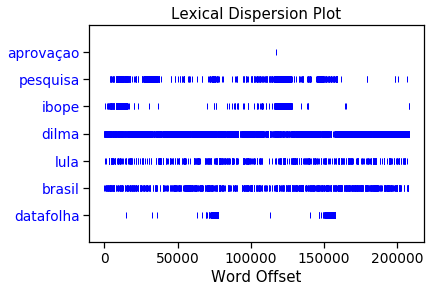

In [ ]:
text.dispersion_plot([u'aprovaçao', 
                      u'pesquisa',
                      u'ibope',
                      u'dilma',
                      u'lula',
                      u'brasil',
                      u'datafolha',
                      ])

Frases mais significativas dos tweets

In [ ]:
manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                          'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                          'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                          'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
        'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
        'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '@','"','...']
stop_words = stopwords.words('portuguese')
for i in manual_list_stop_words:
    stop_words.append(i)

In [ ]:
def score_sentences(sentences, important_words):
    
    CLUSTER_THRESHOLD = 5  
    scores = []
    sentence_idx = -1
   
    for s in [word_tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        
        for w in important_words:
            try:
              
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
     
        if len(word_idx)== 0: continue
        
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
   
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [ ]:
def summarize(txt):
    TOP_SENTENCES = 10  
    N = 100  
   
    sentences = [s for s in word_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in nltk.tokenize.word_tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stop_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)

    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
 
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
   
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [ ]:
sumarios = summarize(texto_sem_tags)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'palavras mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


palavras mais importantes(1):

indicação

carangueijosem

cabeças

igual

inimigos

qualificação

bancárias

